In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

In [73]:
train_df = pd.read_csv('../../input/train/imputed_df.csv', sep=';', index_col=0)
#test_df = pd.read_csv('../../input/test/', sep=';')
train_df

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender,Customer_Type,Type_Travel,Travel_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,52.0,272,0.0,5.0,0,Female,Loyal Customer,Business Travel,Business,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,48.0,2200,9.0,0.0,0,Male,Loyal Customer,Personal Travel,Eco,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,43.0,1061,77.0,119.0,1,Female,Loyal Customer,Business Travel,Business,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,44.0,780,13.0,18.0,0,Female,Loyal Customer,Business Travel,Business,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,50.0,1981,0.0,0.0,1,Female,Loyal Customer,Business Travel,Business,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,32.0,1357,83.0,125.0,0,Male,Loyal Customer,Business Travel,Business,...,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,44.0,592,5.0,11.0,1,Male,Loyal Customer,Business Travel,Business,...,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,63.0,2794,0.0,0.0,1,Male,Loyal Customer,Business Travel,Business,...,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,16.0,2744,0.0,0.0,0,Male,Loyal Customer,Personal Travel,Eco,...,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [74]:
train_df['train_test'] = 'train'
#test_df['train_test'] = 'test'

#df = pd.concat([train_df, test_df])

In [75]:
df = train_df

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Age                      94379 non-null  float64
 2   Travel_Distance          94379 non-null  int64  
 3   Departure_Delay_in_Mins  94379 non-null  float64
 4   Arrival_Delay_in_Mins    94379 non-null  float64
 5   Overall_Experience       94379 non-null  int64  
 6   Gender                   94379 non-null  object 
 7   Customer_Type            94379 non-null  object 
 8   Type_Travel              94379 non-null  object 
 9   Travel_Class             94379 non-null  object 
 10  Seat_Comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_Location        94

In [77]:
# Encode categorical variables
categorical_columns = [col for col in train_df.columns if train_df[col].dtype == 'object']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    df[col] =  pd.Categorical(df[col])

In [78]:
df = pd.get_dummies(df, columns = [x for x in df.columns if x not in ['train_test', 'ID', 'Age', 'Travel_Distance',	'Departure_Delay_in_Mins',	
                                                                      'Arrival_Delay_in_Mins', 'Overall_Experience']])
df

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,train_test,Gender_0,Gender_1,Customer_Type_0,...,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online_Boarding_0,Online_Boarding_1,Online_Boarding_2,Online_Boarding_3,Online_Boarding_4,Online_Boarding_5
0,98800001,52.0,272,0.0,5.0,0,0,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,98800002,48.0,2200,9.0,0.0,0,0,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2,98800003,43.0,1061,77.0,119.0,1,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,98800004,44.0,780,13.0,18.0,0,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,98800005,50.0,1981,0.0,0.0,1,0,True,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,32.0,1357,83.0,125.0,0,0,False,True,False,...,False,True,False,False,False,False,False,False,False,True
94375,98894376,44.0,592,5.0,11.0,1,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
94376,98894377,63.0,2794,0.0,0.0,1,0,False,True,False,...,False,True,False,False,True,False,False,False,False,False
94377,98894378,16.0,2744,0.0,0.0,0,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [79]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop(["ID", "Overall_Experience"])
numerical_columns

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

In [80]:
scaler = StandardScaler()

In [81]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,train_test,Gender_0,Gender_1,Customer_Type_0,...,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online_Boarding_0,Online_Boarding_1,Online_Boarding_2,Online_Boarding_3,Online_Boarding_4,Online_Boarding_5
0,98800001,0.832369,-1.660469,-0.384165,-0.260781,0,0,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,98800002,0.567712,0.215099,-0.148112,-0.391103,0,0,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2,98800003,0.236891,-0.892926,1.635398,2.710567,1,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,98800004,0.303056,-1.166284,-0.043200,0.078057,0,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,98800005,0.700041,0.002054,-0.384165,-0.391103,1,0,True,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,-0.490915,-0.604976,1.792766,2.866953,0,0,False,True,False,...,False,True,False,False,False,False,False,False,False,True
94375,98894376,0.303056,-1.349171,-0.253025,-0.104394,1,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
94376,98894377,1.560176,0.792945,-0.384165,-0.391103,1,0,False,True,False,...,False,True,False,False,True,False,False,False,False,False
94377,98894378,-1.549543,0.744304,-0.384165,-0.391103,0,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [82]:
train_df = df[df['train_test']==0]
test_df = df[df['train_test']==1]

In [102]:
# Define features and target variable
X_train = train_df.drop(columns=['ID', 'Overall_Experience', 'train_test'])
y_train = train_df['Overall_Experience']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42, shuffle=True, test_size=0.2)

X_val = test_df.drop(['ID', 'train_test', 'Overall_Experience'], axis=1)

In [103]:
X_train

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_0,Gender_1,Customer_Type_0,Customer_Type_1,Type_Travel_0,Type_Travel_1,...,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online_Boarding_0,Online_Boarding_1,Online_Boarding_2,Online_Boarding_3,Online_Boarding_4,Online_Boarding_5
45266,1.229355,1.365927,-0.043200,-0.365038,True,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
21531,1.163190,-0.487266,-0.384165,-0.391103,False,True,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
31049,0.633877,-0.901681,-0.200569,-0.026201,True,False,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
15009,2.684967,-1.484391,-0.384165,-0.391103,True,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
66132,0.633877,0.046803,-0.253025,0.025928,False,True,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57704,1.295519,-0.897790,-0.384165,-0.391103,True,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
2744,-0.027766,-0.841367,-0.384165,-0.391103,False,True,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False
15461,1.361683,-0.607894,-0.384165,-0.286845,False,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
24321,0.633877,1.816335,0.323993,-0.234716,False,True,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


In [85]:
X_val

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_0,Gender_1,Customer_Type_0,Customer_Type_1,Type_Travel_0,Type_Travel_1,...,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online_Boarding_0,Online_Boarding_1,Online_Boarding_2,Online_Boarding_3,Online_Boarding_4,Online_Boarding_5
13973,-2.012692,0.747223,-0.384165,-0.391103,False,True,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
738,-0.821736,1.290048,2.159960,1.824375,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
21874,-1.549543,0.843530,-0.384165,-0.391103,True,False,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
10283,0.633877,0.394095,-0.305481,-0.312910,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
64259,-1.880364,1.352307,0.927239,1.980762,False,True,False,True,True,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75294,1.163190,-0.156513,-0.384165,-0.391103,False,True,False,True,True,False,...,False,False,True,False,False,False,False,True,False,False
83333,0.369220,-1.688680,-0.384165,0.104122,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
78196,0.567712,-1.605992,-0.384165,-0.391103,True,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
61361,-1.549543,-0.277141,-0.305481,-0.391103,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


<h1> Logistic Regression </h1>

In [86]:
# Logistic Regression with GridSearchCV
log_reg_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [87]:
log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg.fit(X_train, y_train)

/Users/moury/miniforge3/envs/kinki/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/moury/miniforge3/envs/kinki/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/moury/miniforge3/envs/kinki/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/moury/miniforge3/envs/kinki/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/moury/miniforge3/envs/kinki/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

<h1> Preds on train </h1>

In [88]:
y_pred_log_reg = log_reg.predict(X_train)
accuracy_log_reg = accuracy_score(y_train, y_pred_log_reg)
f1_log_reg = f1_score(y_train, y_pred_log_reg, average='weighted')

In [89]:
print(f"Logistic Regression - Best Parameters: {log_reg.best_params_}")
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, F1 Score: {f1_log_reg}")
print("Classification Report:\n", classification_report(y_train, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_log_reg))

Logistic Regression - Best Parameters: {'C': 100, 'solver': 'liblinear'}
Logistic Regression - Accuracy: 0.9014873581182204, F1 Score: 0.9015176366555653
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     34229
           1       0.91      0.91      0.91     41274

    accuracy                           0.90     75503
   macro avg       0.90      0.90      0.90     75503
weighted avg       0.90      0.90      0.90     75503

Confusion Matrix:
 [[30638  3591]
 [ 3847 37427]]


<h1> Preds on validation </h1>

In [90]:
y_pred_log_reg = log_reg.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
f1_log_reg = f1_score(y_val, y_pred_log_reg, average='weighted')

In [91]:
print(f"Logistic Regression - Best Parameters: {log_reg.best_params_}")
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, F1 Score: {f1_log_reg}")
print("Classification Report:\n", classification_report(y_val, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_log_reg))

Logistic Regression - Best Parameters: {'C': 100, 'solver': 'liblinear'}
Logistic Regression - Accuracy: 0.9007204916295826, F1 Score: 0.9007988223994647
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      8557
           1       0.92      0.90      0.91     10319

    accuracy                           0.90     18876
   macro avg       0.90      0.90      0.90     18876
weighted avg       0.90      0.90      0.90     18876

Confusion Matrix:
 [[7708  849]
 [1025 9294]]


<h1> Random Forest </h1>

In [92]:
# Define the parameter grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf, average='weighted')

In [ ]:
print(f"Random Forest - Best Parameters: {rf_model.best_params_}")
print(f"Random Forest - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}")
print("Classification Report:\n", classification_report(y_train, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_rf))

<h1> Gradient Boosting </h1>

In [93]:
# Gradient Boosting with GridSearchCV
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [95]:
gb_model = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy', n_jobs=-1)
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

<h1> Preds on train </h1>

In [96]:
y_pred_gb = gb_model.predict(X_train)
accuracy_gb = accuracy_score(y_train, y_pred_gb)
f1_gb = f1_score(y_train, y_pred_gb, average='weighted')

In [97]:
print(f"Gradient Boosting - Best Parameters: {gb_model.best_params_}")
print(f"Gradient Boosting - Accuracy: {accuracy_gb}, F1 Score: {f1_gb}")
print("Classification Report:\n", classification_report(y_train, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_gb))

Gradient Boosting - Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - Accuracy: 0.9675642027469107, F1 Score: 0.9675765083778538
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     34229
           1       0.97      0.97      0.97     41274

    accuracy                           0.97     75503
   macro avg       0.97      0.97      0.97     75503
weighted avg       0.97      0.97      0.97     75503

Confusion Matrix:
 [[33164  1065]
 [ 1384 39890]]


<h1> Preds on validation </h1>

In [98]:
y_pred_gb = gb_model.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
f1_gb = f1_score(y_val, y_pred_gb, average='weighted')

In [99]:
print(f"Gradient Boosting - Best Parameters: {gb_model.best_params_}")
print(f"Gradient Boosting - Accuracy: {accuracy_gb}, F1 Score: {f1_gb}")
print("Classification Report:\n", classification_report(y_val, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gb))

Gradient Boosting - Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - Accuracy: 0.952903157448612, F1 Score: 0.9529296034853841
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8557
           1       0.96      0.95      0.96     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876

Confusion Matrix:
 [[8173  384]
 [ 505 9814]]


In [101]:
X_test

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_0,Gender_1,Customer_Type_0,Customer_Type_1,Type_Travel_0,Type_Travel_1,...,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Online_Boarding_0,Online_Boarding_1,Online_Boarding_2,Online_Boarding_3,Online_Boarding_4,Online_Boarding_5


In [100]:
y_pred_gb = gb_model.predict(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 97)) while a minimum of 1 is required by GradientBoostingClassifier.

In [33]:
predictions = pd.DataFrame(y_pred_rf)
predictions['ID'] = test_df['ID']

predictions = predictions[['ID', 0]]
predictions.columns = ['ID', 'Overall_Experience']
predictions

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
...,...,...
35597,99935598,0
35598,99935599,1
35599,99935600,1
35600,99935601,1


In [35]:
predictions.to_csv('../output/submission.csv', sep=';', index=False)

<h1> Multilayer Perceptron </h1>

In [5]:
# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

NameError: name 'X_train' is not defined

In [39]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=0.01),
    tf.keras.callbacks.ReduceLROnPlateau()
]

In [40]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,745 (6.82 KB)

 Trainable params: 1,745 (6.82 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/50


2024-06-24 00:02:20.098929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2212/2212 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8087 - loss: 0.4247 - val_accuracy: 0.9017 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 2/50
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8837 - loss: 0.2893 - val_accuracy: 0.9099 - val_loss: 0.2139 - learning_rate: 0.0010
Epoch 3/50
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8964 - loss: 0.2560 - val_accuracy: 0.9269 - val_loss: 0.1752 - learning_rate: 0.0010
Epoch 4/50
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9132 - loss: 0.2284 - val_accuracy: 0.9328 - val_loss: 0.1647 - learning_rate: 0.0010
Epoch 5/50
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9191 - loss: 0.2138 - val_accuracy: 0.9354 - val_loss: 0.1574 - learning_rate: 0.0010
Epoch 6/50
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9210 - loss: 0.2107 - val_accuracy: 0.9410 - val_loss: 0.1449 - learning_rate: 0.0010
Epoch 7/50
2212/2212 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9239 - los

In [44]:
import numpy as np

In [45]:
# Evaluate the model
y_pred_prob = model.predict(X_val)
y_pred =  np.round(y_pred_prob)

accuracy_nn = accuracy_score(y_val, y_pred)
f1_nn = f1_score(y_val, y_pred, average='weighted')
print(f"Neural Network - Accuracy: {accuracy_nn}, F1 Score: {f1_nn}")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network - Accuracy: 0.94642932824751, F1 Score: 0.9465113632990493
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     10697
         1.0       0.97      0.93      0.95     12898

    accuracy                           0.95     23595
   macro avg       0.95      0.95      0.95     23595
weighted avg       0.95      0.95      0.95     23595

Confusion Matrix:
 [[10314   383]
 [  881 12017]]


In [52]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred =  np.round(y_pred_prob)

1113/1113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [53]:
predictions = pd.DataFrame(y_pred)
predictions['ID'] = test_df['ID']

In [55]:
predictions = predictions[['ID', 0]]
predictions.columns = ['ID', 'Overall_Experience']

In [60]:
predictions['Overall_Experience'] = predictions['Overall_Experience'].astype('int64')

In [61]:
predictions.to_csv('../output/submission2.csv', sep=';', index=False)

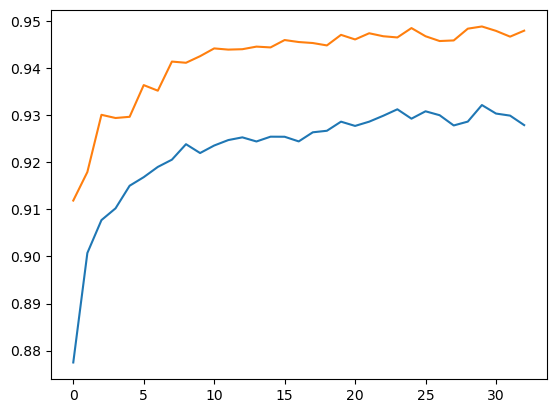

In [54]:
plt.plot(range(33), history.history['accuracy'])
plt.plot(range(33), history.history['val_accuracy'])

In [47]:
import numpy as np
np.round(y_pred_prob)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

(array([26418.,   947.,   801.,   938.,  4200.,   818.,   644.,   762.,
         1081., 34175.]),
 array([1.41081642e-32, 1.00000001e-01, 2.00000003e-01, 3.00000012e-01,
        4.00000006e-01, 5.00000000e-01, 6.00000024e-01, 6.99999988e-01,
        8.00000012e-01, 8.99999976e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

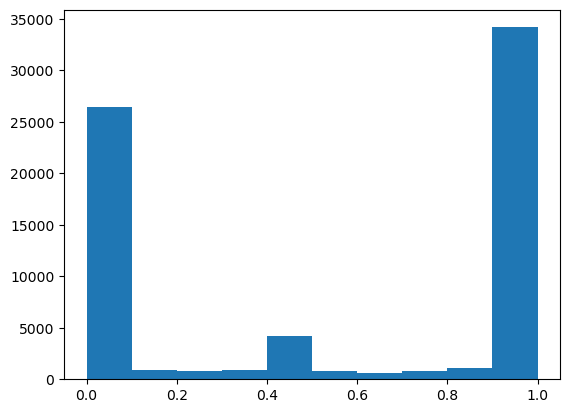

In [43]:
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)

In [27]:
y_pred_rf = rf_model.predict(X_test)

In [33]:
predictions = pd.DataFrame(y_pred_rf)
predictions['ID'] = test_df['ID']

predictions = predictions[['ID', 0]]
predictions.columns = ['ID', 'Overall_Experience']
predictions

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
...,...,...
35597,99935598,0
35598,99935599,1
35599,99935600,1
35600,99935601,1


In [35]:
predictions.to_csv('../output/submission.csv', sep=';', index=False)

array([1, 0])